# Import Used Libraries

In [1]:
from statistics import mode
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

# Reading Dataset from CSV

In [2]:
Dataset = pd.read_csv(r"C:\Users\Mostafa Elgendy\Downloads\BankNote_Authentication.csv") #Official Dataset

# copy of DataSet
Dataset_copy=Dataset.copy()

In [3]:
# shows all Data of the Dateset
Dataset_copy

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
# Showing the Head of Dataset what does it contains and sample of data
Dataset_copy.head() 

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
## 1372 Records without any NULL Value
Dataset_copy.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


# Spliting and Shuffling

In [6]:
# the Training X features
x = Dataset_copy[["variance","skewness","curtosis","entropy"]].values

# actual Output Value
y= Dataset_copy["class"].values   

In [7]:
#Shuffle Dataset and split
from sklearn.model_selection import train_test_split
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.3, random_state=1,shuffle=True)

In [8]:
# See shape of Splitting Data

print(x_Train.shape)
print(x_Test.shape)
print(y_Train.shape)
print(y_Test.shape)

(960, 4)
(412, 4)
(960,)
(412,)


# Standard Scaler

In [9]:
x_Train = (x_Train-np.mean(x))/np.std(x) 
x_Test = (x_Test-np.mean(x))/np.std(x) 

In [10]:
# Showing the x_Train after Scalling
x_Train

array([[ 0.02372729, -0.06505917,  0.36974045, -0.03712022],
       [-0.70981605, -1.29907693,  1.42503006, -0.16625615],
       [-0.3362245 , -0.12101535, -0.15932454, -0.23588576],
       ...,
       [-1.18777658,  1.28775488, -0.01623361, -1.44873463],
       [ 0.33354174,  0.32960401,  0.36426083, -0.17177752],
       [-0.70101544,  0.71787429, -0.3172522 , -0.44783798]])

# KNN Model

In [11]:
class KNN:
    def __init__(self, neigh):
        self.k = neigh
    #[960,4]
    def dis_Euclidean(self,Test_Point): # get distance between test point and x_Train
        Distances=[]
        for i in range (self.x_Train.shape[0]):
            Euclidean=np.sqrt(np.sum(np.square(Test_Point-self.x_Train[i])))
            Distances.append((Euclidean,self.y_Train[i]))
        return Distances
                                     
    def fit_model(self,x_train,y_train): # fitting Model... Initialize Training Data to the model
        self.x_Train = x_train
        self.y_Train = y_Train
    
    def Predict(self,x_Test): # Predict the Class of each Row of x_Test 
        y_Predict=[]
        for i in range (x_Test.shape[0]):  # x_Test.shape[0] = 412
            DistanceList= self.dis_Euclidean(x_Test[i])
            
            # Sorting Data According 2 index 0 (Which is the Euclidean Value)
            DistanceList.sort(key = lambda x: x[0])
            
            # Making list of the k Neighbors Points to the TestPoint to Euclidean Equation
            Neighbors=[]
            for j in range (self.k) :
                Neighbors.append(DistanceList[j][1])

            # Mode Function Is Imported from Statistics Library 
            # if i have to modes therefore the first will be returned (As Required in Ass P.T(1) tie Problem)
            y_Predict.append(mode(Neighbors))
        return y_Predict
    
    def Accuracy(self,y_T,y_Predict): # Calculate the Accuracy for the Model
        if y_Predict!=None:
            rightPredictions= np.sum(y_Predict==y_T)
        return rightPredictions/len(y_T)*100 , rightPredictions

# Running the Model

## Test Case #1

In [12]:
accuracies=[]
Model_1 = KNN(1)
Model_1.fit_model(x_Train,y_Train)

# Predicting the data
y_Predict=Model_1.Predict(x_Test)

#get Accuracy and Num of Right Predictions
Accuracy,Right_Predictions = Model_1.Accuracy(y_Test,y_Predict)
print("K value : ",Model_1.k)
print("Number of correctly classified instances :" , Right_Predictions, "Total number of instances :" ,y_Test.shape[0])
print("Accuracy : ","%.2f" % Accuracy ,"%")
accuracies.append(float("%.2f" % Accuracy))

K value :  1
Number of correctly classified instances : 411 Total number of instances : 412
Accuracy :  99.76 %


## Test Case #2

In [13]:
Model_2= KNN(2)
Model_2.fit_model(x_Train,y_Train)

# Predicting the data
y_Predict=Model_2.Predict(x_Test)

#get Accuracy and Num of Right Predictions
Accuracy,Right_Predictions = Model_2.Accuracy(y_Test,y_Predict)
print("K value : ",Model_2.k)
print("Number of correctly classified instances :" , Right_Predictions, "Total number of instances :" ,y_Test.shape[0])
print("Accuracy : ","%.2f" % Accuracy ,"%")
accuracies.append(float("%.2f" % Accuracy))

K value :  2
Number of correctly classified instances : 411 Total number of instances : 412
Accuracy :  99.76 %


## Test Case #3

In [14]:
Model_3= KNN(3)
Model_3.fit_model(x_Train,y_Train)

# Predicting the data
y_Predict=Model_3.Predict(x_Test)

#get Accuracy and Num of Right Predictions
Accuracy,Right_Predictions = Model_3.Accuracy(y_Test,y_Predict)
print("K value : ",Model_3.k)
print("Number of correctly classified instances : " , Right_Predictions, "Total number of instances : " ,y_Test.shape[0])
print("Accuracy : ","%.2f" % Accuracy ,"%")#get Accuracy and Num of Right Predictions
Accuracy,Right_Predictions = Model_2.Accuracy(y_Test,y_Predict)
accuracies.append(float("%.2f" % Accuracy))

K value :  3
Number of correctly classified instances :  411 Total number of instances :  412
Accuracy :  99.76 %


## Test Case #4

In [15]:
Model_4= KNN(4)
Model_4.fit_model(x_Train,y_Train)

# Predicting the data
y_Predict=Model_4.Predict(x_Test)

#get Accuracy and Num of Right Predictions
Accuracy,Right_Predictions = Model_4.Accuracy(y_Test,y_Predict)
print("K value : ",Model_4.k)
print("Number of correctly classified instances :" , Right_Predictions, "Total number of instances :" ,y_Test.shape[0])
print("Accuracy : ","%.2f" % Accuracy ,"%")
accuracies.append(float("%.2f" % Accuracy))

K value :  4
Number of correctly classified instances : 411 Total number of instances : 412
Accuracy :  99.76 %


## Test Case #5

In [16]:
Model_5= KNN(5)
Model_5.fit_model(x_Train,y_Train)

# Predicting the data
y_Predict=Model_5.Predict(x_Test)

#get Accuracy and Num of Right Predictions
Accuracy,Right_Predictions = Model_5.Accuracy(y_Test,y_Predict)
print("K value : ",Model_5.k)
print("Number of correctly classified instances :" , Right_Predictions, "Total number of instances :" ,y_Test.shape[0])
print("Accuracy : ","%.2f" % Accuracy ,"%")
accuracies.append(float("%.2f" % Accuracy))

K value :  5
Number of correctly classified instances : 411 Total number of instances : 412
Accuracy :  99.76 %


## Test Case #6

In [17]:
Model_6= KNN(6)
Model_6.fit_model(x_Train,y_Train)

# Predicting the data
y_Predict=Model_6.Predict(x_Test)

#get Accuracy and Num of Right Predictions
Accuracy,Right_Predictions = Model_6.Accuracy(y_Test,y_Predict)
print("K value : ",Model_6.k)
print("Number of correctly classified instances :" , Right_Predictions, "Total number of instances :" ,y_Test.shape[0])
print("Accuracy : ","%.2f" % Accuracy ,"%")
accuracies.append(float("%.2f" % Accuracy))

K value :  6
Number of correctly classified instances : 411 Total number of instances : 412
Accuracy :  99.76 %


## Test Case #7

In [18]:
Model_7= KNN(7)
Model_7.fit_model(x_Train,y_Train)

# Predicting the data
y_Predict=Model_7.Predict(x_Test)

#get Accuracy and Num of Right Predictions
Accuracy,Right_Predictions = Model_7.Accuracy(y_Test,y_Predict)
print("K value : ",Model_7.k)
print("Number of correctly classified instances :" , Right_Predictions, "Total number of instances :" ,y_Test.shape[0])
print("Accuracy : ","%.2f" % Accuracy ,"%")
accuracies.append(float("%.2f" % Accuracy))

K value :  7
Number of correctly classified instances : 412 Total number of instances : 412
Accuracy :  100.00 %


## Test Case #8

In [19]:
Model_8= KNN(8)
Model_8.fit_model(x_Train,y_Train)

# Predicting the data
y_Predict=Model_8.Predict(x_Test)

#get Accuracy and Num of Right Predictions
Accuracy,Right_Predictions = Model_8.Accuracy(y_Test,y_Predict)
print("K value : ",Model_8.k)
print("Number of correctly classified instances :" , Right_Predictions, "Total number of instances :" ,y_Test.shape[0])
print("Accuracy : ","%.2f" % Accuracy ,"%")
accuracies.append(float("%.2f" % Accuracy))

K value :  8
Number of correctly classified instances : 412 Total number of instances : 412
Accuracy :  100.00 %


## Test Case #9

In [20]:
Model_9= KNN(9)
Model_9.fit_model(x_Train,y_Train)

# Predicting the data
y_Predict=Model_9.Predict(x_Test)

#get Accuracy and Num of Right Predictions
Accuracy,Right_Predictions = Model_9.Accuracy(y_Test,y_Predict)
print("K value : ",Model_9.k)
print("Number of correctly classified instances :" , Right_Predictions, "Total number of instances :" ,y_Test.shape[0])
print("Accuracy : ","%.2f" % Accuracy ,"%")
accuracies.append(float("%.2f" % Accuracy))

K value :  9
Number of correctly classified instances : 412 Total number of instances : 412
Accuracy :  100.00 %


# Change in Accuracy by Increasing K-Value

In [21]:
knn=[1,2,3,4,5,6,7,8,9]
my_np1=np.array([knn,accuracies])
df = pd.DataFrame(my_np1).T
df.columns=['KNN','Accuracy']
df

,KNN,Accuracy
0,1.0,99.76
1,2.0,99.76
2,3.0,99.76
3,4.0,99.76
4,5.0,99.76
5,6.0,99.76
6,7.0,100.00
7,8.0,100.00
8,9.0,100.00


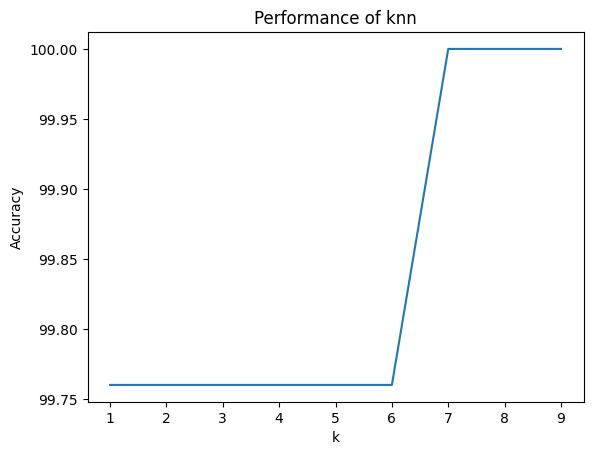

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#accuracies.sort()
ax.plot([1,2,3,4,5,6,7,8,9],accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of knn")
plt.show()